In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import psycopg2
import pandas.io.sql as sqlio
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Conexão com Postgres e leitura dos dados

In [4]:
user = 'postgres'
password = 'postgres'
host = 'localhost'
port = '5432'
database = 'ANP'
table_name = 'preco_combustivel'
schema_name = 'anp'

In [5]:
conn = psycopg2.connect(dbname=database, user=user, password=password,
                        host=host, port=port)

In [6]:
sql = f"""
SELECT * FROM {schema_name}.{table_name}
"""

df = sqlio.read_sql_query(sql, conn)

In [7]:
df_anp = df[['data_coleta','regiao','uf','municipio','bairro','bandeira','produto','valor_venda','unidade_medida']]
df_anp.head()

,data_coleta,regiao,uf,municipio,bairro,bandeira,produto,valor_venda,unidade_medida
0,2018-01-02,NE,BA,SALVADOR,STIEP,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370,R$ / m³
1,2018-01-02,NE,BA,SALVADOR,STIEP,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240,R$ / litro
2,2018-01-02,NE,BA,SALVADOR,STIEP,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930,R$ / litro
3,2018-01-02,NE,BA,SALVADOR,STIEP,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620,R$ / litro
4,2018-01-02,S,RS,CANOAS,CENTRO,BRANCA,GNV,2.699,R$ / m³


# Criação colunas ano e mes

In [8]:
df_anp['ano'] = df_anp['data_coleta'].dt.year
df_anp['mes'] = df_anp['data_coleta'].dt.month
df_anp.head()

,data_coleta,regiao,uf,municipio,bairro,bandeira,produto,valor_venda,unidade_medida,ano,mes
0,2018-01-02,NE,BA,SALVADOR,STIEP,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370,R$ / m³,2018,1
1,2018-01-02,NE,BA,SALVADOR,STIEP,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240,R$ / litro,2018,1
2,2018-01-02,NE,BA,SALVADOR,STIEP,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930,R$ / litro,2018,1
3,2018-01-02,NE,BA,SALVADOR,STIEP,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620,R$ / litro,2018,1
4,2018-01-02,S,RS,CANOAS,CENTRO,BRANCA,GNV,2.699,R$ / m³,2018,1


# Plot: data coleta x valor venda

## Todos produtos

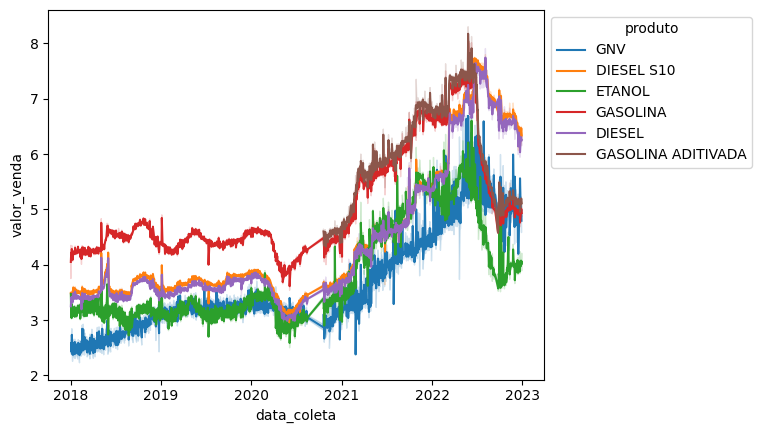

In [9]:
ax = sns.lineplot(df_anp, x='data_coleta', y='valor_venda', hue='produto')

sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

## Separado por produto

In [25]:
def plot_boxplot_2v(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('whitegrid')
    
    fig, ax = plt.subplots(figsize=(12,6))
    
    sns.boxplot(x=x, y=y, data=dataset, ax=ax, hue=x)

    ax.figure.set_size_inches(11,5)

    ax.set_title(titulo, loc='center', fontsize=15)
    ax.set_xlabel(labelx, fontsize=12)
    ax.set_ylabel(labely, fontsize=12)

    fig.show()

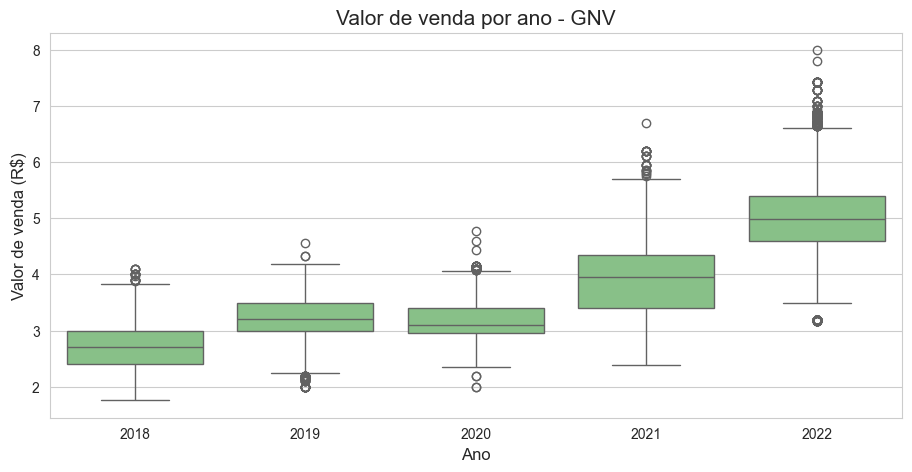

In [22]:
x = 'ano'
labelx = 'Ano'
y = 'valor_venda'
labely = 'Valor de venda (R$)'

for prod in df_anp['produto'].unique()[:1]:
    dataset = df_anp.loc[df_anp['produto'] == prod]

    titulo = f"Valor de venda por ano - {prod}"

    plot_boxplot_2v(titulo, labelx, labely, x, y, dataset)

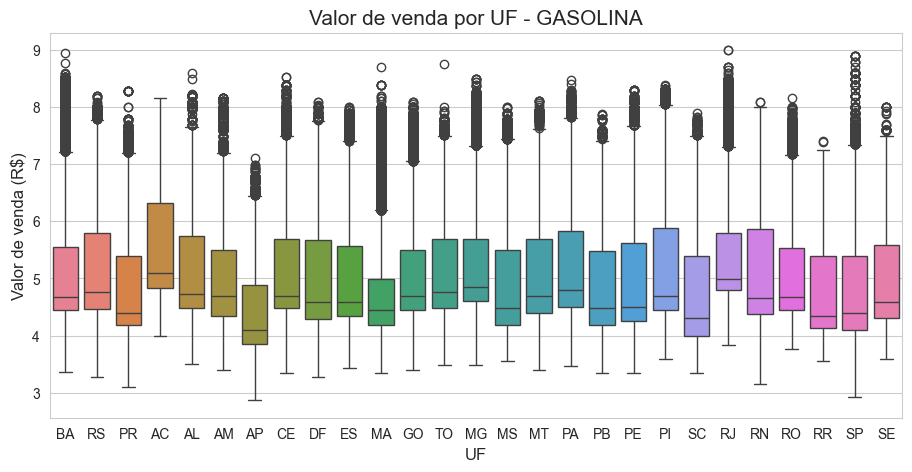

In [27]:
x = 'uf'
labelx = 'UF'
y = 'valor_venda'
labely = 'Valor de venda (R$)'

for prod in df_anp['produto'].unique()[3:4]:
    dataset = df_anp.loc[df_anp['produto'] == prod]

    titulo = f"Valor de venda por UF - {prod}"

    plot_boxplot_2v(titulo, labelx, labely, x, y, dataset)

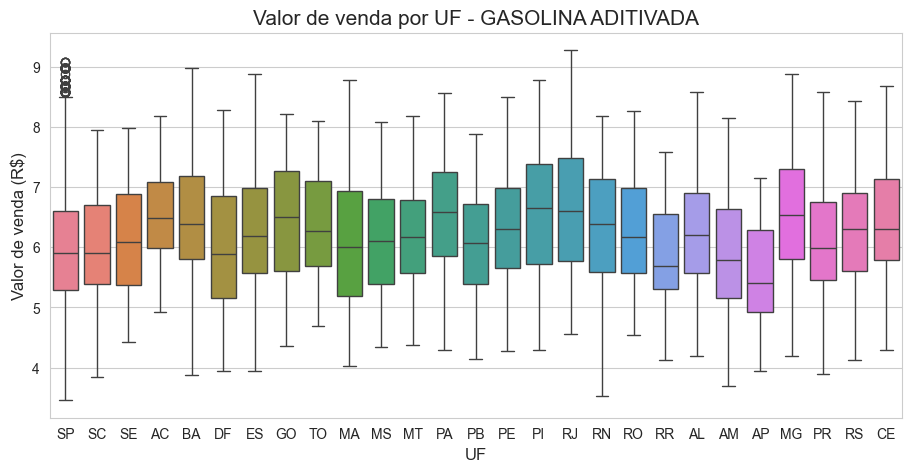

In [29]:
x = 'uf'
labelx = 'UF'
y = 'valor_venda'
labely = 'Valor de venda (R$)'

for prod in df_anp['produto'].unique()[5:6]:
    dataset = df_anp.loc[df_anp['produto'] == prod]

    titulo = f"Valor de venda por UF - {prod}"

    plot_boxplot_2v(titulo, labelx, labely, x, y, dataset)

In [30]:
df_anp['produto'].unique()

array(['GNV', 'DIESEL S10', 'ETANOL', 'GASOLINA', 'DIESEL',
       'GASOLINA ADITIVADA'], dtype=object)

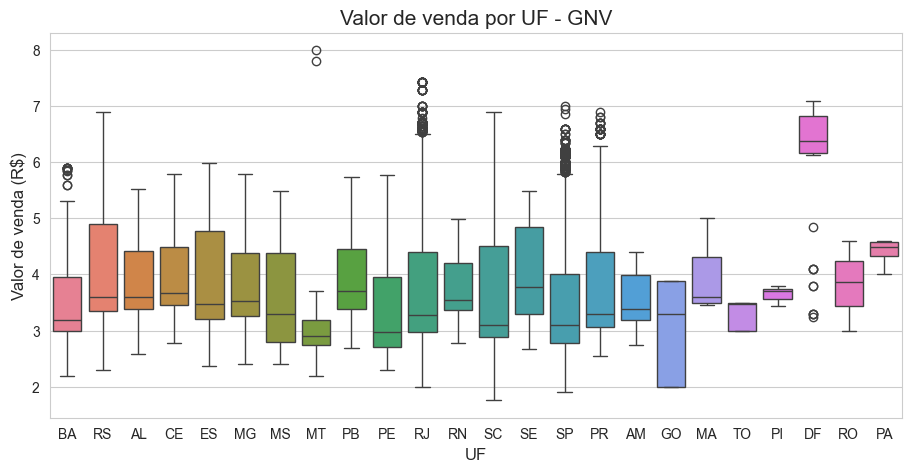

In [33]:
x = 'uf'
labelx = 'UF'
y = 'valor_venda'
labely = 'Valor de venda (R$)'

for prod in df_anp['produto'].unique()[:1]:
    dataset = df_anp.loc[df_anp['produto'] == prod]

    titulo = f"Valor de venda por UF - {prod}"

    plot_boxplot_2v(titulo, labelx, labely, x, y, dataset)

# Plot: quantidade de bandeiras por estado

In [34]:
df_anp['bandeira'].nunique()

85

In [36]:
bandeiras_estado  = df_anp.groupby('uf').agg({'bandeira':'nunique'}).reset_index()
bandeiras_estado.head()

,uf,bandeira
0,AC,10
1,AL,10
2,AM,11
3,AP,4
4,BA,12


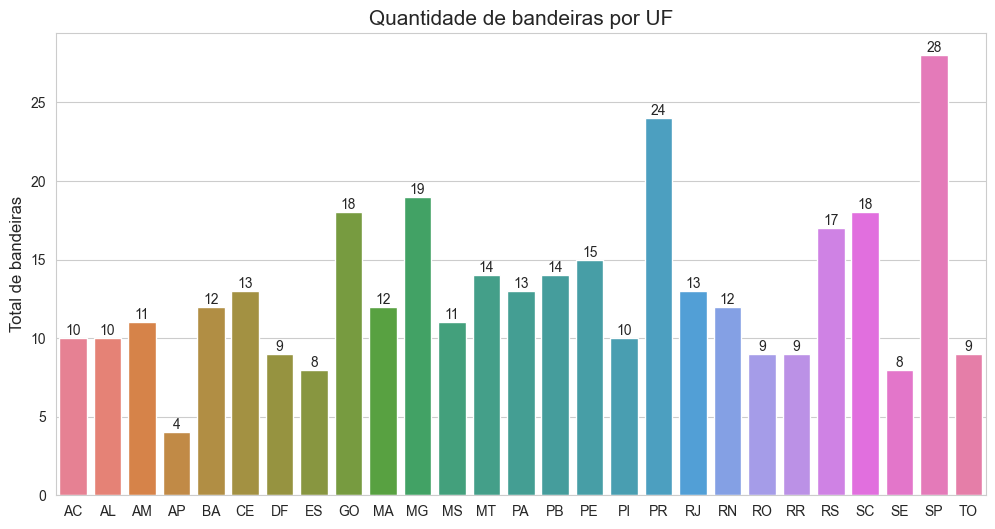

In [42]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data=bandeiras_estado, x='uf', y='bandeira', hue='uf', ax=ax)

ax.set_ylabel('Total de bandeiras', fontsize=12)
ax.set_xlabel('')

ax.set_title('Quantidade de bandeiras por UF', fontsize=15)

for index,row in bandeiras_estado.iterrows():
    plt.annotate(row['bandeira'], xy=(index, row['bandeira']), ha='center', va='bottom')

fig.show()